# Imports

In [78]:
# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

# PyROOT imports
from ROOT import TTree, TFile

# SciKitHep imports
import uproot
import hist

#other
import numpy as np

# Setup plotting

In [79]:
plt.rcParams['figure.figsize'] = [10, 8]
font = {'family' : 'serif','weight' : 'normal','size'   : 22}
plt.rc('font', **font)

# Get data

#### List contents of file using pyroot

In [80]:
# path = '/Users/kcoliver-mallory/LZ/S2o_ML_MSci_students/3H.root'
path = '/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_fixed.root'
file = TFile.Open(path)
tree = file.Get('Events')

In [81]:
file.ls()

TFile**		/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_fixed.root	
 TFile*		/Users/ruadhri/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 4/Msci Project/Example Programmes/data/bg_sr1_fixed.root	
  OBJ: TTree	Events	Events : 0 at: 0x1257e0be0
  KEY: TTree	Events;1	Events


In [82]:
for ii in range(tree.GetListOfBranches().GetEntries()):
    print(tree.GetListOfBranches()[ii].GetName())

runID
evtID
S2_area
S2_btm_area
S2_top_area
S2_TBA
S2_corrected_area
S2_XY_corrected_area
S2_width_ns
S2_peakAmp
S2_AFT_5
S2_AFT_10
S2_AFT_25
S2_AFT_50
S2_AFT_75
S2_AFT_90
S2_AFT_95
S2_rmsWidth_ns
S2_fwhm_ns
S2_x_cm
S2_y_cm
S2_xy_chiSq
S2_n_saturated
has_good_S1
drift_time
S1_area
S1_corrected_area
evt_total_area
evt_bad_area
evt_bad_e_area
evt_bad_ph_area
evt_bad_oth_area


#### Read data with uproot

In [83]:
# Read some or all branches into memory in an akward array

data = uproot.concatenate(f'{path}:Events',
                          #filter_name=['runID','evtID']
                         )
data.fields

['runID',
 'evtID',
 'S2_area',
 'S2_btm_area',
 'S2_top_area',
 'S2_TBA',
 'S2_corrected_area',
 'S2_XY_corrected_area',
 'S2_width_ns',
 'S2_peakAmp',
 'S2_AFT_5',
 'S2_AFT_10',
 'S2_AFT_25',
 'S2_AFT_50',
 'S2_AFT_75',
 'S2_AFT_90',
 'S2_AFT_95',
 'S2_rmsWidth_ns',
 'S2_fwhm_ns',
 'S2_x_cm',
 'S2_y_cm',
 'S2_xy_chiSq',
 'S2_n_saturated',
 'has_good_S1',
 'drift_time',
 'S1_area',
 'S1_corrected_area',
 'evt_total_area',
 'evt_bad_area',
 'evt_bad_e_area',
 'evt_bad_ph_area',
 'evt_bad_oth_area']

In [84]:
# Read in pointers to every TBranch of the TTree

data2 = uproot.open(f'{path}:Events')
#data2.keys()

# Read in 5000000 events at a time as arrays
for batch in data2.iterate(step_size=500000):
    #print(repr(batch))
    print(batch.evtID[0])

50002
66924
144688
70014


# Make a plot

In [85]:
# Define some useful axes

r_axis = hist.axis.Regular(1010,-1,100,name="r_axis",label="r",underflow=False,overflow=False)
drift_axis = hist.axis.Regular(2000,-1000000,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)

S2_axis = hist.axis.Regular(1000,-40,4000,name="S2_axis",label="S2_area",underflow=False,overflow=False)
S1_axis = hist.axis.Regular(1000,-800,80000,name="S1_axis",label="S1_area",underflow=False,overflow=False)

In [90]:
# Define some useful cuts

r_cut = ((data.S2_x_cm**2 + data.S2_y_cm**2)**0.5 < 65)
drift_cut = ((65000 < data.drift_time) & (data.drift_time < 900000))
fiducial_cut = (r_cut & drift_cut)

S2o_cut = (data.S1_area == -999)

  Regular(1010, -1, 100, underflow=False, overflow=False, name='r_axis', label='r'),
  Regular(2000, -1e+06, 1e+06, underflow=False, overflow=False, name='drift_axis', label='drift_time'),
  storage=Double()) # Sum: 1483433.0


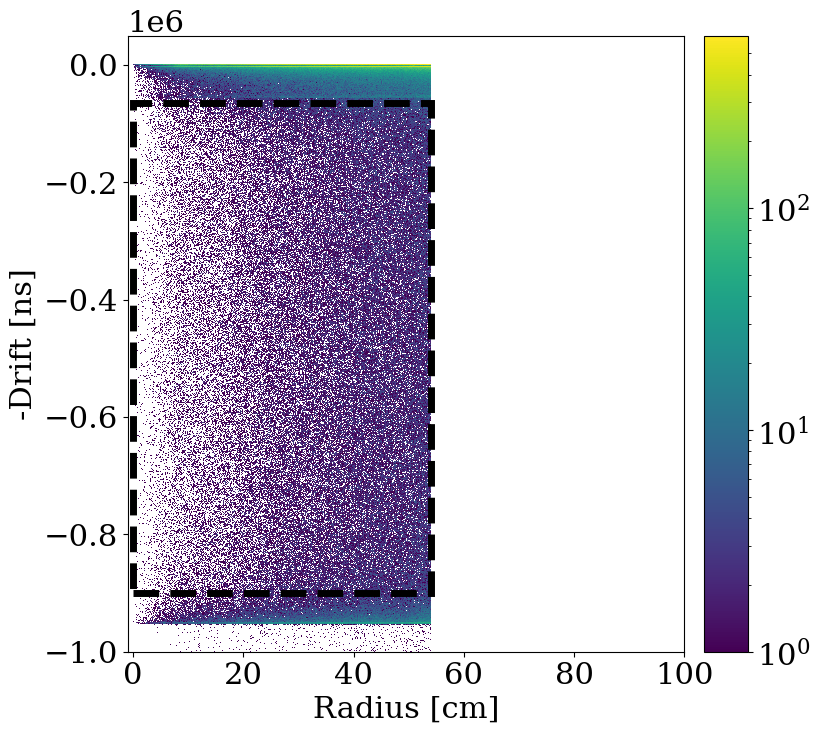

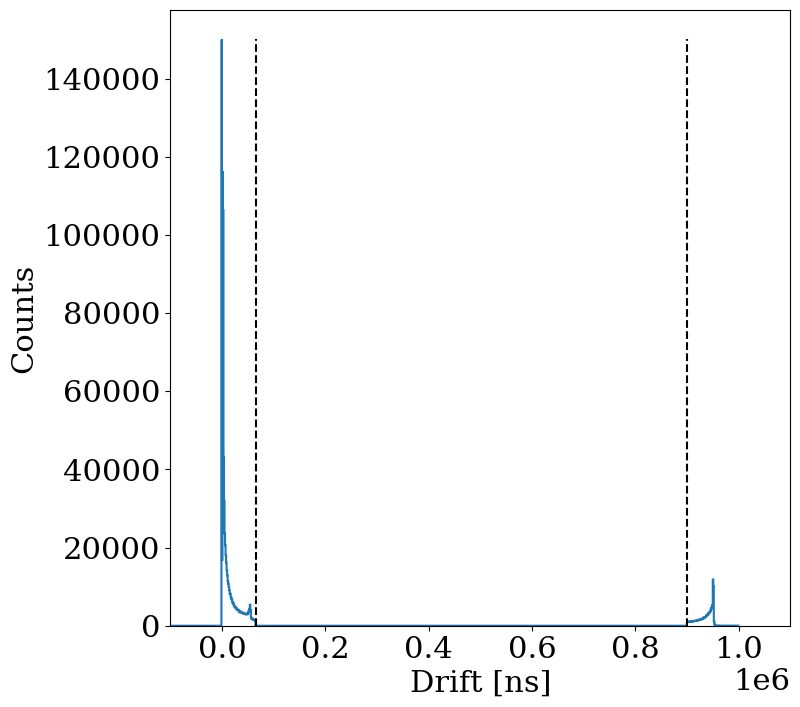

In [104]:
fig, ax = plt.subplots(figsize=(8,8))

r_drift_hist = hist.Hist(r_axis,drift_axis)
# r_drift_hist.fill((data.S2_x_cm**2 + data.S2_y_cm**2)**0.5,-data.drift_time)
r_drift_hist.fill((data.S2_x_cm**2 + data.S2_y_cm**2)**0.5,-data.drift_time)
r_drift_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

drift_cut_rec1 = Rectangle((0,-900000),54,835000,fill=False,color='black',linewidth=5,linestyle='--')
ax.add_patch(drift_cut_rec1)
ax.set(xlabel='Radius [cm]',ylabel='-Drift [ns]',ylim=[-1000000,50000])#, xlim=[0,100])

drift_cut = ((data.drift_time < 65000) | (900000 < data.drift_time))

# check 1D drift time hist for comparison
fig, ax = plt.subplots(figsize=(8,8))
drift_axis_1d = hist.axis.Regular(2000,-1000000,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)
drift_hist_1d = hist.Hist(drift_axis_1d)
drift_hist_1d.fill(data.drift_time[drift_cut])
drift_hist_1d.plot()
ax.set(xlabel='Drift [ns]',ylabel='Counts', xlim=[-0.1e6,1.1e6])
plt.plot(np.zeros(50)+65000, np.linspace(0,150000), linestyle='--', color='black')
plt.plot(np.zeros(50)+900000, np.linspace(0,150000), linestyle='--', color='black')

# check S2_x and S2_y for drift cut
# fig, ax = plt.subplots(figsize=(8,8))
# drift_S2x_axis = hist.axis.Regular(2000,-1000,1000,name="S2_x",label="S2_x",underflow=False,overflow=False)
# drift_S2y_axis = hist.axis.Regular(2000,-1000,1000,name="S2_y",label="S2_y",underflow=False,overflow=False)
# drift_S2xy = hist.Hist(drift_S2x_axis, drift_S2y_axis)
# drift_S2xy.fill(data.S2_x_cm, data.S2_y_cm)
# drift_S2xy.plot()
#ax.set(xlabel='Drift [ns]',ylabel='Counts', xlim=[-0.1e6,1.1e6])
#plt.plot(np.zeros(50)+65000, np.linspace(0,150000), linestyle='--', color='black')
#plt.plot(np.zeros(50)+900000, np.linspace(0,150000), linestyle='--', color='black')

[Text(0.5, 0, 'Uncorrected S2 area [phd]'), Text(0, 0.5, 'Counts')]

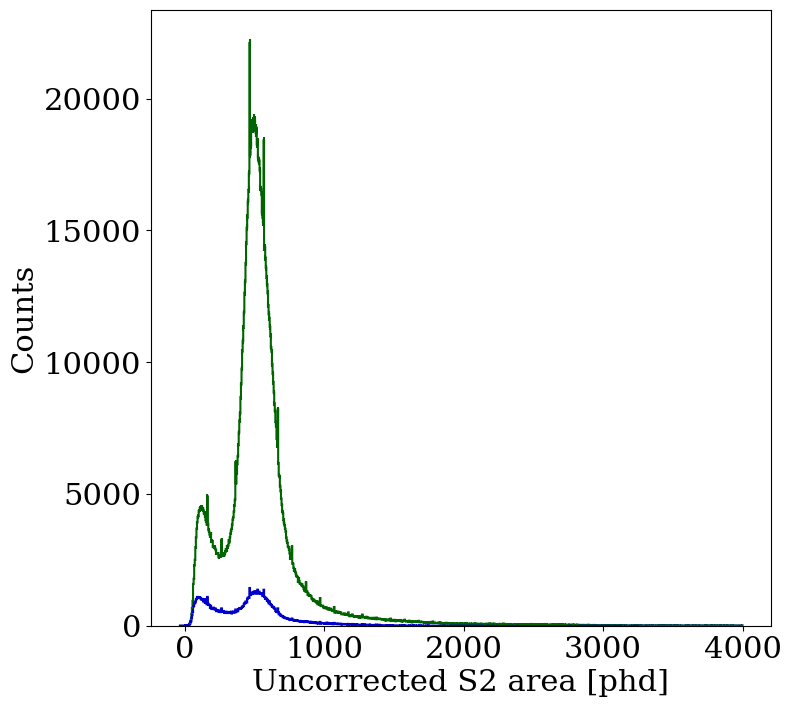

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

S2_hist = hist.Hist(S2_axis)
S2_hist.fill(data.S2_area)
S2_hist.plot(color='darkgreen')

S2o_hist = hist.Hist(S2_axis)
S2o_hist.fill(data.S2_area[S2o_cut])
S2o_hist.plot(color='mediumblue')

ax.set(xlabel='Uncorrected S2 area [phd]',ylabel='Counts')

  Regular(1000, -40, 4000, underflow=False, overflow=False, name='S2_axis', label='S2_area'),
  Regular(1000, -800, 80000, underflow=False, overflow=False, name='S1_axis', label='S1_area'),
  storage=Double()) # Sum: 1359564.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x32e19e3d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x30e593990>, text=[])

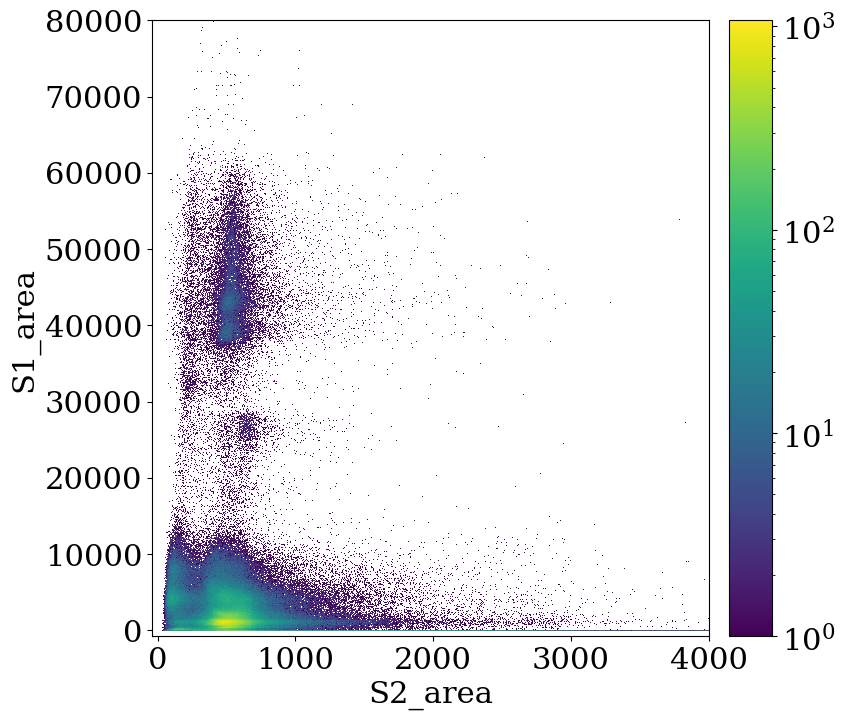

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

S2S1_hist = hist.Hist(S2_axis,S1_axis)
S2S1_hist.fill(data.S2_area,data.S1_area)
S2S1_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

#ax.set(xlim=[-2500,3000],ylabel='Counts',yscale='log')
#ax.set(xlabel='Uncorrected S2 area [phd]',ylabel='Counts')

In [ ]:
s1_cut = ((0 < data.S2_area) & (data.S2_area < 200))
s2_cut = ((35000 < data.S1_area) & (data.S1_area < 60000))
cut = s1_cut & s2_cut & fiducial_cut

for ii in range(10):
    print('%i\t%i'%(data.runID[cut][ii], data.evtID[cut][ii]))

7066	121677
7057	116247
6996	135413
7015	108824
7015	109354
7024	107040
6940	16895
6940	17330
7026	8394
7066	113320


# Troubleshooting Plots

  Regular(1000, -40, 40000, underflow=False, overflow=False, name='S1_area'),
  Regular(1000, -40, 40000, underflow=False, overflow=False, name='S1_corrected_area', label='S1_area_cor'),
  storage=Double()) # Sum: 1303762.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x32e2103d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x32e09e590>, text=[])

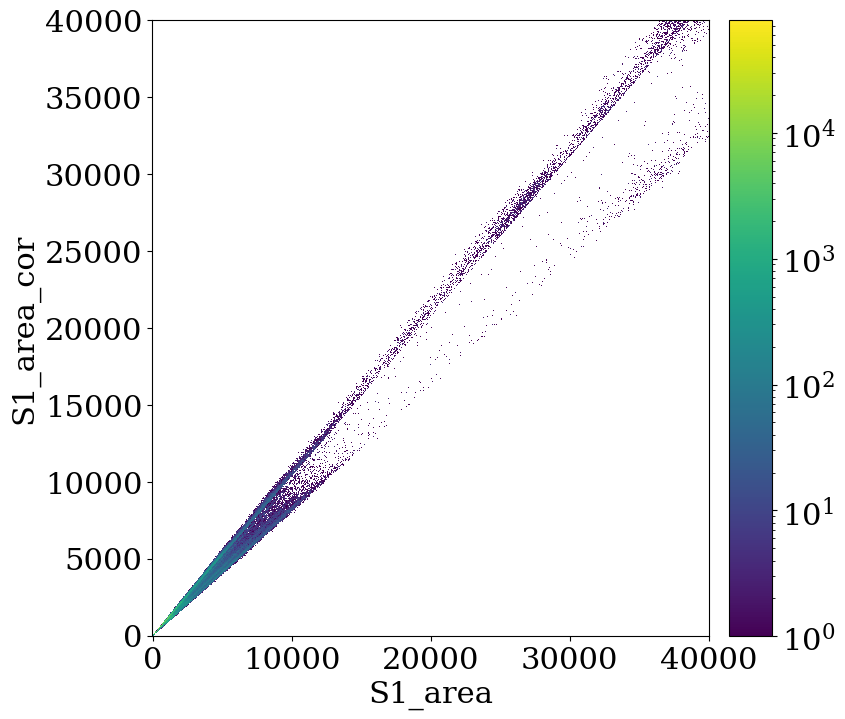

In [ ]:
# S1_area_cor vs S1_area

S1_area_cor_axis = hist.axis.Regular(1000,-40,40000,name="S1_corrected_area",label="S1_area_cor",underflow=False,overflow=False)
S1_area_axis = hist.axis.Regular(1000,-40,40000,name="S1_area",label="S1_area",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

S1_area_hist = hist.Hist(S1_area_axis, S1_area_cor_axis)
S1_area_hist.fill(data.S1_area, data.S1_corrected_area)
S1_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

  Regular(1000, -40, 40000, underflow=False, overflow=False, name='S2_area'),
  Regular(1000, -40, 40000, underflow=False, overflow=False, name='S2_corrected_area', label='S2_area_cor'),
  storage=Double()) # Sum: 283259.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x32ea14a90>, cbar=<matplotlib.colorbar.Colorbar object at 0x32de0e590>, text=[])

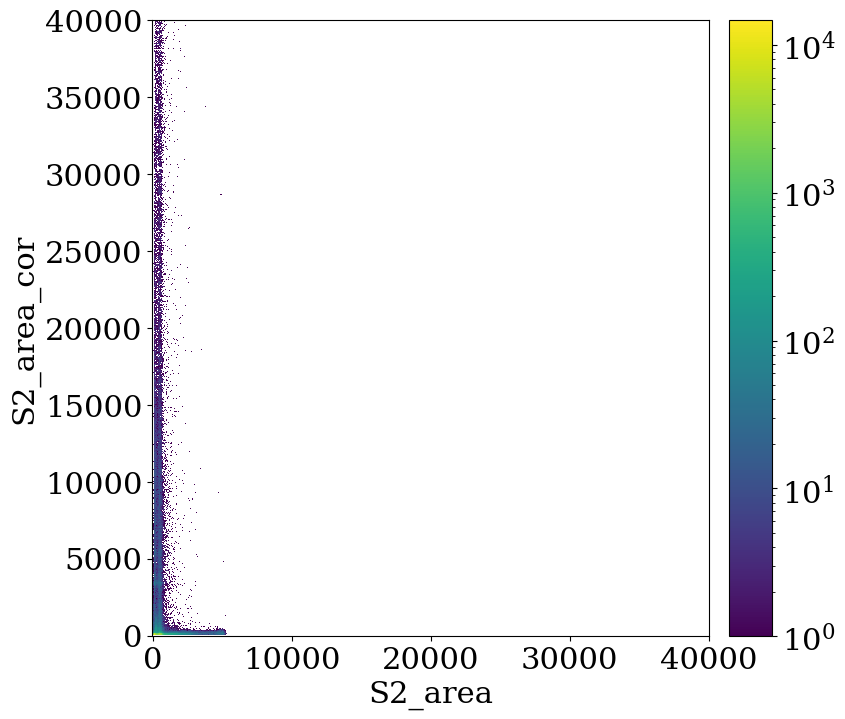

In [ ]:
# S2_area_cor vs S2_area

S2_area_cor_axis = hist.axis.Regular(1000,-40,40000,name="S2_corrected_area",label="S2_area_cor",underflow=False,overflow=False)
S2_area_axis = hist.axis.Regular(1000,-40,40000,name="S2_area",label="S2_area",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

S2_area_hist = hist.Hist(S2_area_axis, S2_area_cor_axis)
S2_area_hist.fill(data.S2_area, data.S2_corrected_area)
S2_area_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

  Regular(1000, -40, 4000, underflow=False, overflow=False, name='S2_xy_corrected_area', label='S2_xy_area_cor'),
  Regular(1000, -40, 4000, underflow=False, overflow=False, name='S2_area'),
  storage=Double()) # Sum: 231592.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x32ef33050>, cbar=<matplotlib.colorbar.Colorbar object at 0x32ecc8fd0>, text=[])

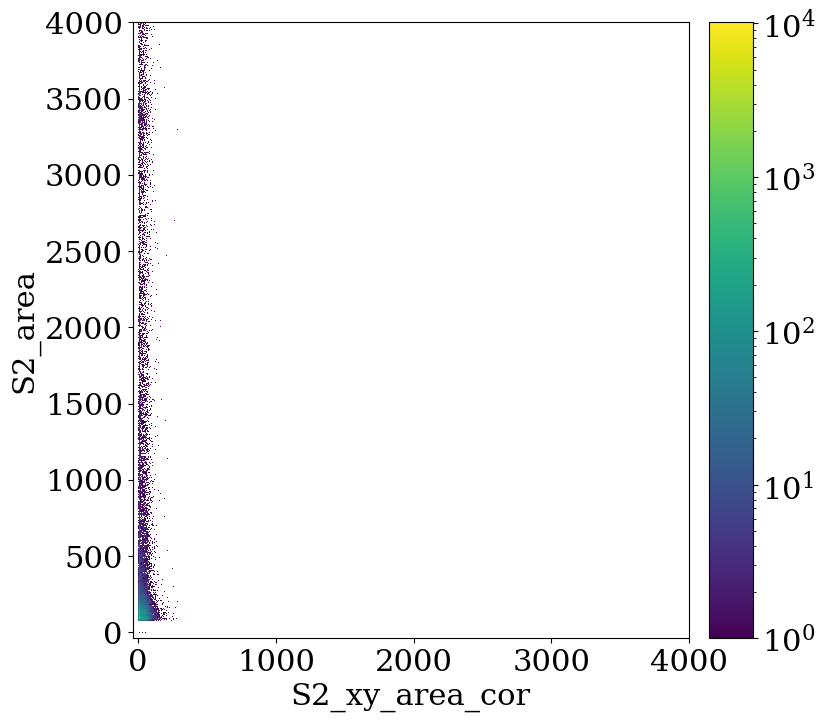

In [ ]:
# S2_area_cor vs S2_xy_area_cor

S2_xy_area_axis = hist.axis.Regular(1000,-40,4000,name="S2_xy_corrected_area",label="S2_xy_area_cor",underflow=False,overflow=False)
S2_area_axis = hist.axis.Regular(1000,-40,4000,name="S2_area",label="S2_area",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

S2_cor_hist = hist.Hist(S2_xy_area_axis, S2_area_axis)
S2_cor_hist.fill(data.S2_XY_corrected_area, data.S2_corrected_area)
S2_cor_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

  Regular(1000, -40, 10000, underflow=False, overflow=False, name='S1_corrected_area', label='S1_area_cor'),
  Regular(1000, -40, 4e+06, underflow=False, overflow=False, name='S2_corrected_area', label='S2_area_cor'),
  storage=Double()) # Sum: 1273060.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x32ea9ca10>, cbar=<matplotlib.colorbar.Colorbar object at 0x32ee8c250>, text=[])

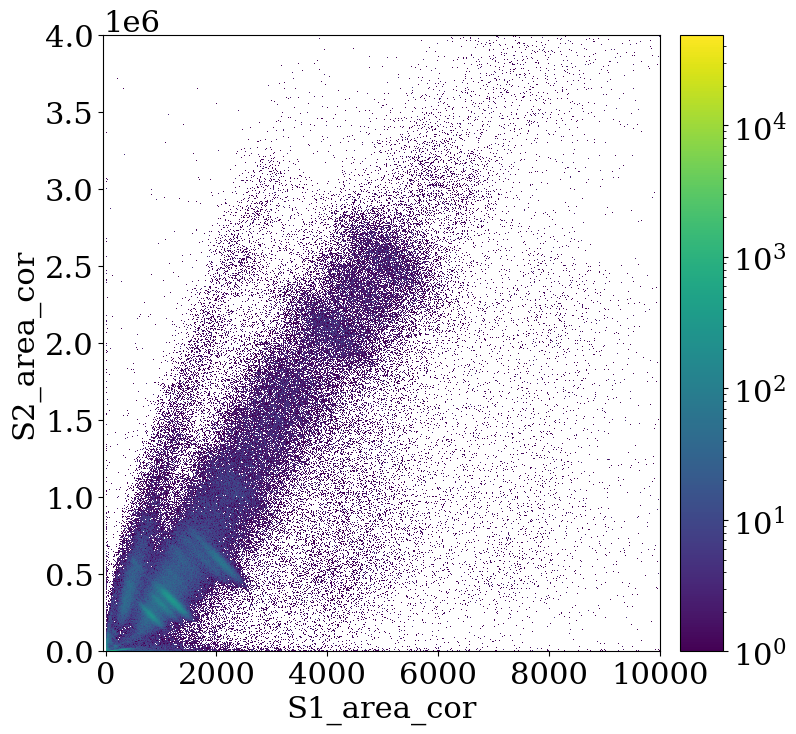

In [ ]:
# S2 corrected vs S1 corrected

S2_area_cor_axis = hist.axis.Regular(1000,-40,4000000,name="S2_corrected_area",label="S2_area_cor",underflow=False,overflow=False)
S1_area_cor_axis = hist.axis.Regular(1000,-40,10000,name="S1_corrected_area",label="S1_area_cor",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

S2_cor_hist = hist.Hist(S1_area_cor_axis, S2_area_cor_axis)
S2_cor_hist.fill(data.S1_corrected_area, data.S2_corrected_area)
S2_cor_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

  Regular(1000, -40, 4e+06, underflow=False, overflow=False, name='r_raw'),
  Regular(1000, -40, 10000, underflow=False, overflow=False, name='r'),
  storage=Double()) # Sum: 253801.0


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x32e519d50>, cbar=<matplotlib.colorbar.Colorbar object at 0x32e226590>, text=[])

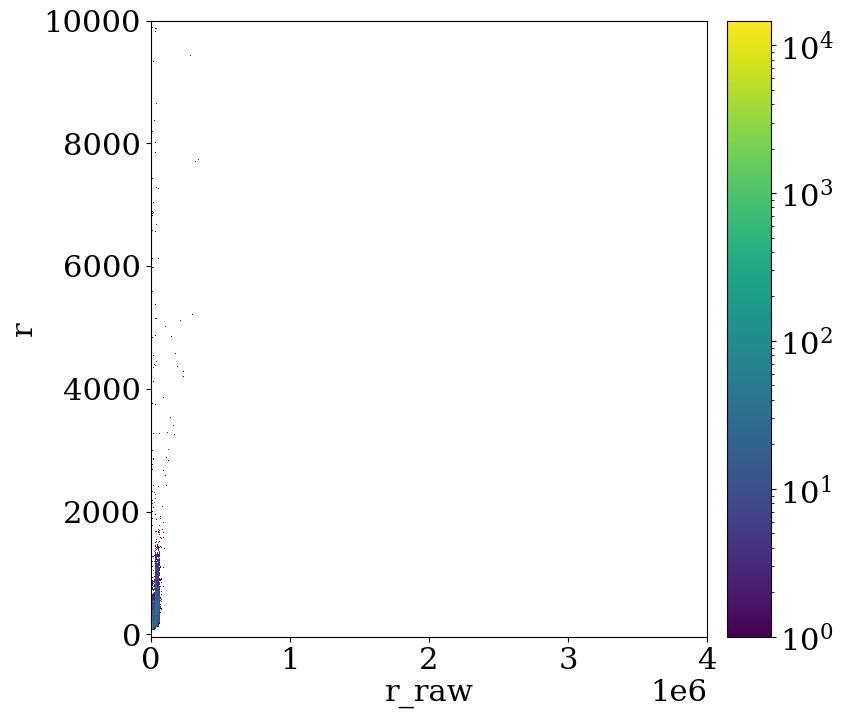

In [ ]:
# r vs r_raw

r_raw_axis = hist.axis.Regular(1000,-40,4000000,name="r_raw",label="r_raw",underflow=False,overflow=False)
r_axis = hist.axis.Regular(1000,-40,10000,name="r",label="r",underflow=False,overflow=False)

fig, ax = plt.subplots(figsize=(8,8))

radial_hist = hist.Hist(r_raw_axis, r_axis)
radial_hist.fill(data.S1_corrected_area, data.S2_corrected_area)
radial_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')